# MSIS 579 HW3 RNN to Classify Reuters Topics

In this homework, we will train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [2]:
%tensorflow_version 2.8.0
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

from __future__ import print_function

!pip install numpy
import numpy as np
import keras
keras.__version__

UsageError: Line magic function `%tensorflow_version` not found.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/api/datasets/reuters/) for details on how to load the data.

In [26]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.text import Tokenizer

max_words = 10000 # Number of words to consider as features

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

Loading data...


In [27]:
# TODO pad train and test sequences
from keras.preprocessing import sequence

maxlen = 500
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [28]:
# TODO convert labels into one hot encodings
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Task 1: Fully Connected Neural Networks

In this task, we will learn a 128-dimensional word embedding layer as well as fully connected layers to classify Reuters newwires. Please refer to the lab code from lesson 4. Start with 10 epochs and watch out for overfitting. Hint: number of unique labels is 46

In [38]:
model = Sequential()  
model.add(Embedding(max_words, 128, input_length = maxlen))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Flatten())
model.add(Dense(46,activation='softmax')) 

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 dense_12 (Dense)            (None, 500, 64)           8256      
                                                                 
 dense_13 (Dense)            (None, 500, 64)           4160      
                                                                 
 dropout_4 (Dropout)         (None, 500, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_14 (Dense)            (None, 46)                1472046   
                                                                 
Total params: 2,764,462
Trainable params: 2,764,462
N

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
             metrics = ['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test,y_test))

Epoch 1/10
281/281 [==============================] - 11s 38ms/step - loss: 1.8648 - acc: 0.5188 - val_loss: 1.6570 - val_acc: 0.5784
Epoch 2/10
281/281 [==============================] - 11s 38ms/step - loss: 1.4997 - acc: 0.6256 - val_loss: 1.5605 - val_acc: 0.6291
Epoch 3/10
281/281 [==============================] - 10s 36ms/step - loss: 1.3537 - acc: 0.6672 - val_loss: 1.5246 - val_acc: 0.6478
Epoch 4/10
281/281 [==============================] - 11s 37ms/step - loss: 1.2354 - acc: 0.6966 - val_loss: 1.4619 - val_acc: 0.6616
Epoch 5/10
281/281 [==============================] - 11s 38ms/step - loss: 1.1516 - acc: 0.7136 - val_loss: 1.4336 - val_acc: 0.6728
Epoch 6/10
281/281 [==============================] - 11s 38ms/step - loss: 1.0819 - acc: 0.7288 - val_loss: 1.4144 - val_acc: 0.6768
Epoch 7/10
281/281 [==============================] - 11s 39ms/step - loss: 1.0128 - acc: 0.7472 - val_loss: 1.4392 - val_acc: 0.6857
Epoch 8/10
281/281 [==============================] - 11s 40ms

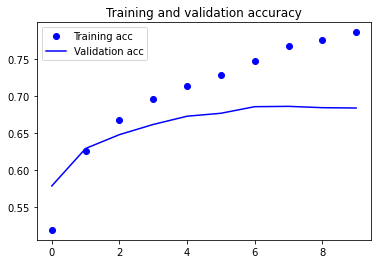

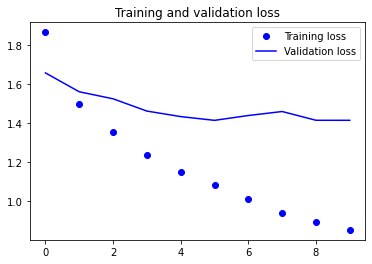

In [42]:
# TODO do you need to do early stopping? if so, train a new model with approperate number of epochs
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
# adjust epochs to 5 to avoid overfitting
model = Sequential()
model.add(Embedding(max_words, 128, input_length = maxlen))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Flatten())
model.add(Dense(46,activation='softmax')) 

model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ['acc']
)
model.fit(x_train,
          y_train,
          epochs=5,
          batch_size=32,
          validation_data=(x_test,y_test))

Epoch 1/5
281/281 [==============================] - 11s 36ms/step - loss: 1.8683 - acc: 0.5181 - val_loss: 1.6454 - val_acc: 0.5744
Epoch 2/5
281/281 [==============================] - 10s 35ms/step - loss: 1.5044 - acc: 0.6224 - val_loss: 1.5795 - val_acc: 0.6069
Epoch 3/5
281/281 [==============================] - 10s 35ms/step - loss: 1.3772 - acc: 0.6509 - val_loss: 1.5466 - val_acc: 0.6287
Epoch 4/5
281/281 [==============================] - 10s 35ms/step - loss: 1.2834 - acc: 0.6802 - val_loss: 1.4956 - val_acc: 0.6492
Epoch 5/5
281/281 [==============================] - 10s 35ms/step - loss: 1.1918 - acc: 0.6994 - val_loss: 1.4829 - val_acc: 0.6594


Report the test set performance of the fully connected model

In [44]:
# TODO evaluate fully connected model on test set
results = model.evaluate(x_test,y_test,verbose=0)
print("Model test loss:",results[0])
print("Model test accuracy:",results[1])

Model test loss: 1.4828919172286987
Model test accuracy: 0.6593945026397705


## Task 2: RNN and LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. In this task, we will swap out the fully connect layers and replace with both RNN and LSTM layers to compare their difference see if they can help improve the model performance over fully connected model.

### Single layer RNN model with 128 output units for 10 epochs

In [6]:
#Train a RNN model
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import SimpleRNN
from keras import layers

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(SimpleRNN(128))
model.add(layers.Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 1,035,246
Trainable params: 1,035,246
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=.2)

Epoch 1/10
57/57 [==============================] - 16s 266ms/step - loss: 3.7184 - acc: 0.1846 - val_loss: 2.5762 - val_acc: 0.3450
Epoch 2/10
57/57 [==============================] - 14s 255ms/step - loss: 2.8336 - acc: 0.2974 - val_loss: 2.3910 - val_acc: 0.3651
Epoch 3/10
57/57 [==============================] - 14s 246ms/step - loss: 2.4419 - acc: 0.3814 - val_loss: 2.1628 - val_acc: 0.4741
Epoch 4/10
57/57 [==============================] - 14s 247ms/step - loss: 2.1411 - acc: 0.4750 - val_loss: 2.0218 - val_acc: 0.4964
Epoch 5/10
57/57 [==============================] - 14s 253ms/step - loss: 1.9148 - acc: 0.5184 - val_loss: 2.0139 - val_acc: 0.5198
Epoch 6/10
57/57 [==============================] - 14s 247ms/step - loss: 1.7472 - acc: 0.5574 - val_loss: 1.8550 - val_acc: 0.5392
Epoch 7/10
57/57 [==============================] - 15s 262ms/step - loss: 1.5314 - acc: 0.6230 - val_loss: 1.9364 - val_acc: 0.4964
Epoch 8/10
57/57 [==============================] - 16s 276ms/step - 

In [8]:
# TODO evaluate RNN model on test set
results = model.evaluate(x_test,y_test,verbose=0)
print("Model test loss:",results[0])
print("Model test accuracy:",results[1])

Model test loss: 1.8771014213562012
Model test accuracy: 0.5427426695823669


### Signle layer LSTM model with 128 output units for 20 epochs

In [9]:
# train a LSTM model
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(layers.LSTM(128, input_shape=(max_words,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 48s 826ms/step - loss: 2.4814 - acc: 0.3555 - val_loss: 2.1015 - val_acc: 0.4786
Epoch 2/20
57/57 [==============================] - 54s 941ms/step - loss: 2.0821 - acc: 0.4695 - val_loss: 1.9865 - val_acc: 0.4780
Epoch 3/20
57/57 [==============================] - 53s 931ms/step - loss: 1.8937 - acc: 0.5068 - val_loss: 1.8636 - val_acc: 0.5147
Epoch 4/20
57/57 [==============================] - 53s 930ms/step - loss: 1.7443 - acc: 0.5428 - val_loss: 1.7008 - val_acc: 0.5626
Epoch 5/20
57/57 [==============================] - 53s 926ms/step - loss: 1.6074 - acc: 0.5827 - val_loss: 1.6015 - val_acc: 0.5865
Epoch 6/20
57/57 [==============================] - 52s 920ms/step - loss: 1.5146 - acc: 0.6026 - val_loss: 1.6287 - val_acc: 0.5676
Epoch 7/20
57/57 [==============================] - 53s 933ms/step - loss: 1.4159 - acc: 0.6257 - val_loss: 1.5336 - val_acc: 0.6082
Epoch 8/20
57/57 [==============================] - 54s 951ms/step - 

In [18]:
# TODO evaluate LSTM model on test set
results = model.evaluate(x_test,y_test,verbose=0)
print("Model test loss:",results[0])
print("Model test accuracy:",results[1])

Model test loss: 2.1257805824279785
Model test accuracy: 0.5013356804847717


## Task 3: Use a Pre-trained Word Embedding

In this task, instead of learning the word embedding layer from scratch, we apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/nlp/pretrained_word_embeddings/#load-pretrained-word-embeddings) for loading glove-6B pretrained embedding.

Build a **LSTM** model instead of CNN model showen in the API page. Only refer to the API for loading pretrained weights into embedding layer.

Does the pre-trained word embedding help improve the model prediction?


In [22]:
# TODO Train a LSTM model using pretrained embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-06-08 04:16:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu... 171.64.67.140
Connecting to nlp.stanford.edu|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-06-08 04:16:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-06-08 04:16:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu... 171.64.64.22
Connecting to downloads.cs.stanford.edu|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glove.6B.zip        100%[===================>] 822.24M  4.72MB/s    in 2m 42s  

2022-06-08 04:19:39 (5.08 MB/s) - 'glov

In [19]:
import os
import numpy as np

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "Desktop/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [20]:
num_tokens = len(word_index) + 2
embedding_dim = 100
hits = 0
misses = 0
# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words which cant be found in the embedding index will be all 0
        # "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Changed %d words (%d misses)" % (hits, misses))

Changed 24975 words (6004 misses)


In [21]:
from keras.layers import LSTM, Dropout
from keras.initializers import Constant

model = Sequential()
model.add(Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False,
))
model.add(LSTM(128))
model.add(Dense(46, activation ='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         3098100   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,221,282
Trainable params: 123,182
Non-trainable params: 3,098,100
_________________________________________________________________


In [22]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ['acc'])

history = model.fit(
    x_train, 
    y_train,
    epochs = 10,
    batch_size=128,
    validation_split =.2
)

Epoch 1/10
57/57 [==============================] - 41s 684ms/step - loss: 2.4186 - acc: 0.3780 - val_loss: 2.3107 - val_acc: 0.4413
Epoch 2/10
57/57 [==============================] - 39s 680ms/step - loss: 2.2066 - acc: 0.4426 - val_loss: 3.6921 - val_acc: 0.3450
Epoch 3/10
57/57 [==============================] - 39s 692ms/step - loss: 2.1531 - acc: 0.4539 - val_loss: 2.0678 - val_acc: 0.4663
Epoch 4/10
57/57 [==============================] - 40s 708ms/step - loss: 2.0460 - acc: 0.4739 - val_loss: 2.0509 - val_acc: 0.4758
Epoch 5/10
57/57 [==============================] - 41s 726ms/step - loss: 1.9761 - acc: 0.4881 - val_loss: 2.0635 - val_acc: 0.4830
Epoch 6/10
57/57 [==============================] - 41s 712ms/step - loss: 1.8778 - acc: 0.5033 - val_loss: 1.8378 - val_acc: 0.5086
Epoch 7/10
57/57 [==============================] - 42s 731ms/step - loss: 1.8258 - acc: 0.5176 - val_loss: 1.8489 - val_acc: 0.5086
Epoch 8/10
57/57 [==============================] - 41s 723ms/step - 

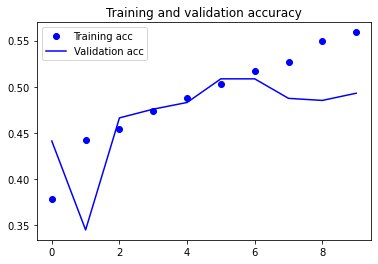

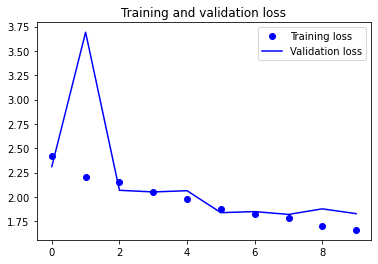

In [23]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# TODO evaluate LSTM model on test set
results = model.evaluate(x_test,y_test,verbose=0)
print("Model test loss:",results[0])
print("Model test accuracy:",results[1])

Model test loss: 1.8289949893951416
Model test accuracy: 0.4826357960700989
